<a href="https://colab.research.google.com/github/HimanshuTirole-22/Machine-Learning/blob/main/Q2logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inline Priting of Visualizations
sns.set()
%matplotlib inline

# flexible and easy-to-use missing data visualizations
import missingno as msno

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew


In [9]:
abalone_data=pd.read_csv("/content/abalone1.csv")
# Get glimpse of data
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
# As Rings: +1.5 gives the age in years , So we will replace rings with age
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [11]:
#  Now we will drop Rings
abalone_data.drop('Rings', axis=1, inplace=True)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [12]:
# Get information about our dat frame
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Shucked weight   4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Age              4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


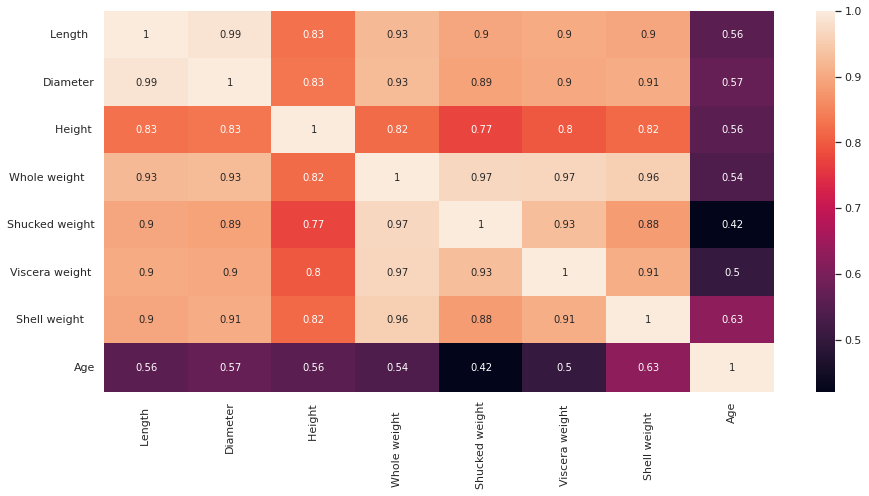

In [14]:
# Correlation between all features
# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.heatmap(abalone_data.corr(),annot=True,ax=ax)
plt.show()

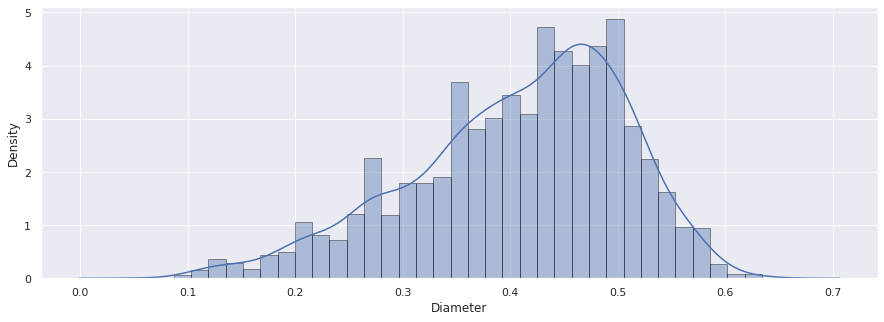

In [20]:
# Diameter
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Diameter'],hist_kws={'edgecolor':'black'})
plt.show()

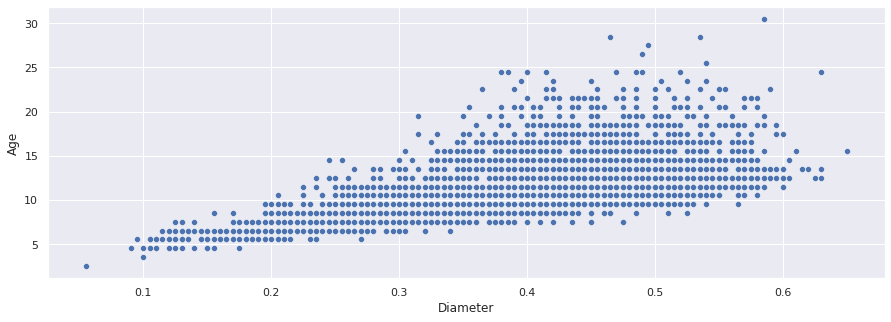

In [21]:
# Relation of Diameter vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Diameter", y="Age",data = abalone_data,ax=ax)
plt.show()

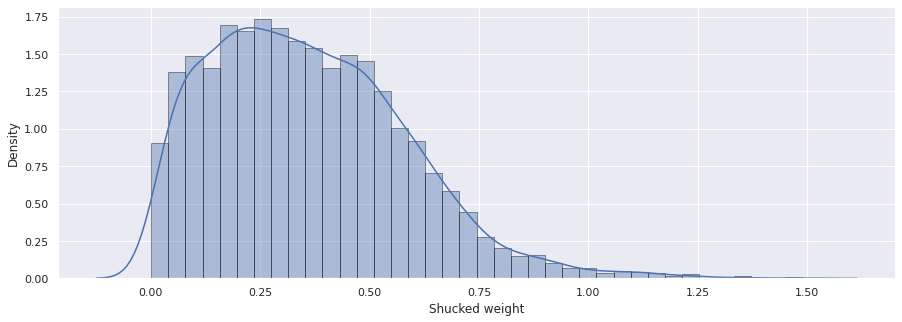

In [24]:
# Shucked weight
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(abalone_data['Shucked weight'],hist_kws={'edgecolor':'black'})
plt.show()

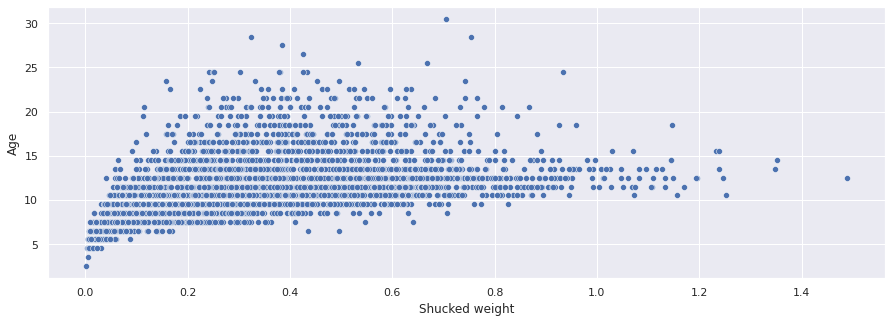

In [25]:
# Relation of Shucked weight vs rings
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Shucked weight", y="Age",data = abalone_data,ax=ax)
plt.show()

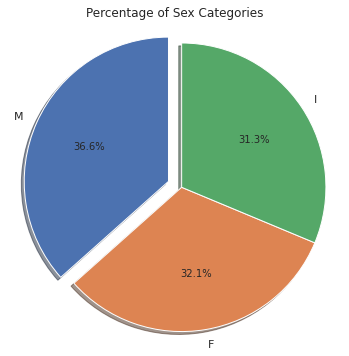

In [28]:
# Sex
labels = abalone_data.Sex.unique().tolist()
sizes = abalone_data.Sex.value_counts().tolist()
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Sex Categories")

plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


In [31]:
one_hot_encoders_abalone_df =  pd.get_dummies(abalone_data)
cols = one_hot_encoders_abalone_df.columns
abalone_clean_data = pd.DataFrame(one_hot_encoders_abalone_df,columns= cols)
abalone_clean_data.head(1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,16.5,0,0,1
